# Logistic Regression Project

This project will be sing a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. It will focus on trying to create a model that will predict whether or not a user will click on an ad based off the features presented.

The data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Reading in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Checking the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Using info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Using seaborn to explore the data!

** Creating a histogram of the Age **

Text(0.5, 0, 'Age')

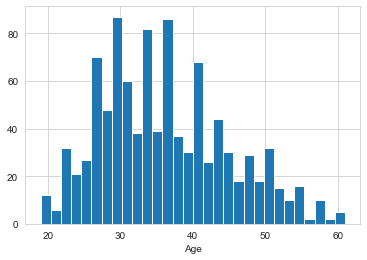

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

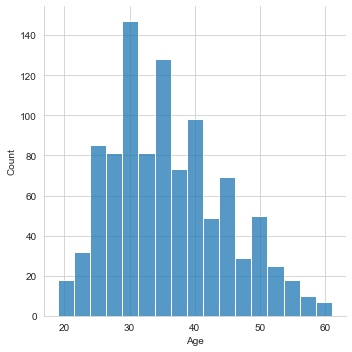

In [7]:
sns.displot(ad_data['Age'] )

**Creating a jointplot showing Area Income versus Age.**

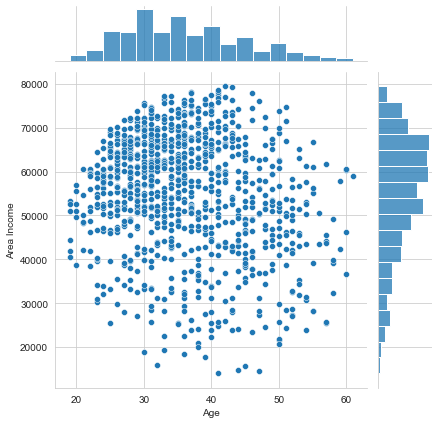

In [9]:
sns.jointplot(x='Age', y='Area Income', data= ad_data)

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

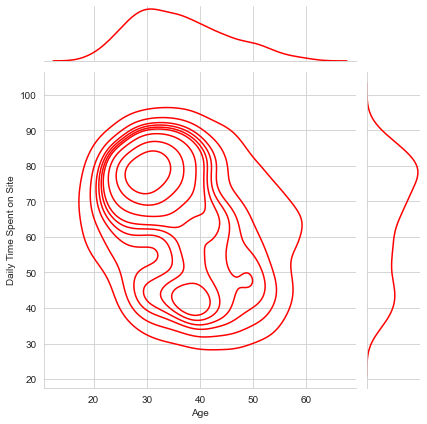

In [12]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= ad_data, kind='kde', color='red')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

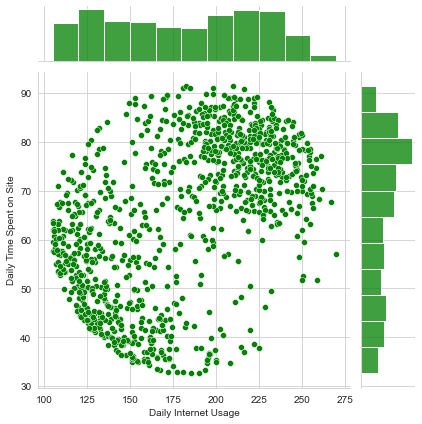

In [13]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data= ad_data, color='green')

**Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

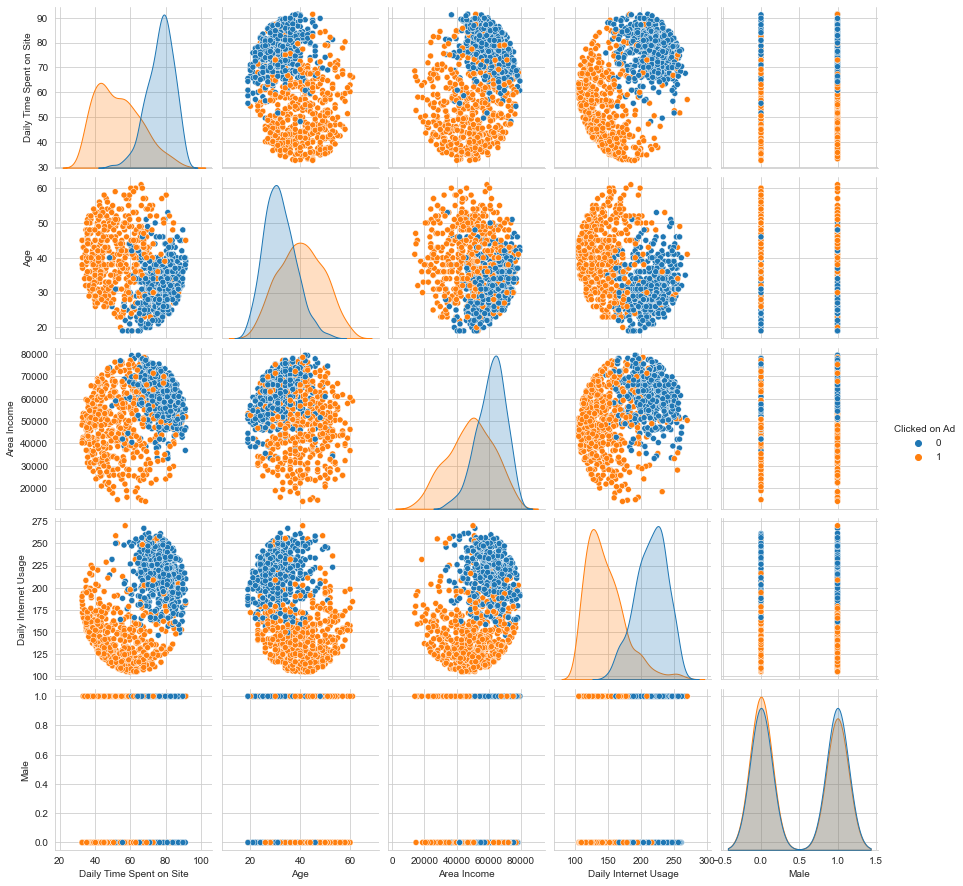

In [19]:
sns.pairplot(data=ad_data, hue='Clicked on Ad')

# Logistic Regression

Performing train test split to train our model!


**Split the data into training set and testing set using train_test_split**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations

**Now predicting values for the testing data.**

In [22]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



***The model is able to predict with and accuracy of 94% that a user will click on the ad will visiting a website base off his features.***